In [162]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from sklearn.decomposition import PCA 

## Problem Statement

This model will aim to predict breast cancer type as either malignant or benign based on the best features(independent variables).  Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


In [163]:
os.getcwd()

'D:\\Datasets'

In [164]:
os.chdir(r"D:\Datasets")

In [165]:
cancer=pd.read_csv(r"D:\Datasets\data (1).csv")

In [166]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [167]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [168]:
cancer.shape

(569, 33)

In [169]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## Missing Value Check

In [170]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [171]:
df=pd.DataFrame()
df['coun']=cancer.isnull().sum()
df['perc']=cancer.isnull().sum()/len(cancer)*100
df

,coun,perc
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


In [172]:
cancer.drop(columns=["Unnamed: 32","id"],inplace=True)

In [173]:
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [174]:
cancer.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [175]:
cancer["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [176]:
357/569

0.6274165202108963

In [177]:
col = cancer.columns

### Outlier Detection for radius_mean

In [178]:
#print("Highest allowed",cancer['radius_mean'].mean() + 3*cancer['radius_mean'].std())
#print("Lowest allowed",cancer['radius_mean'].mean() - 3*cancer['radius_mean'].std())

In [179]:
cancer1=cancer.select_dtypes(include=['float64'])

<ipython-input-180-cee9887ee861>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(17,1))
<ipython-input-180-cee9887ee861>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(17,1))
<ipython-input-180-cee9887ee861>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(17,1)

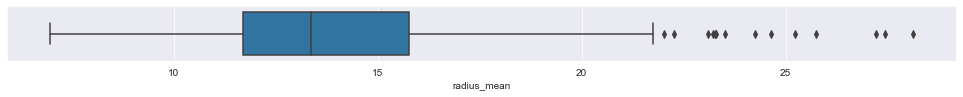

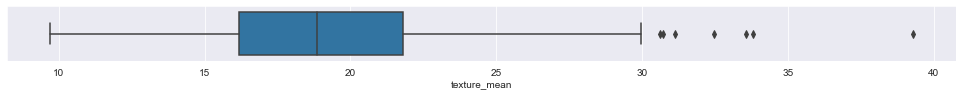

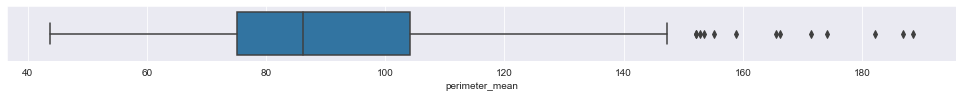

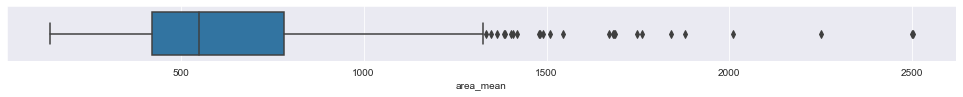

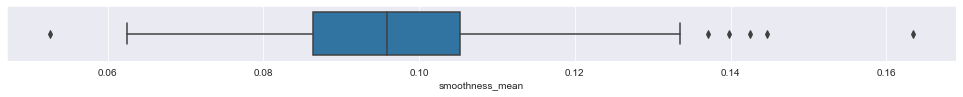

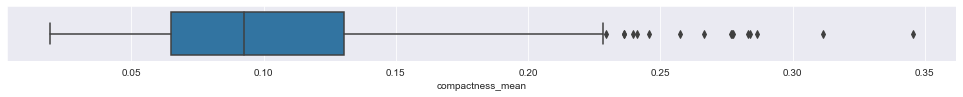

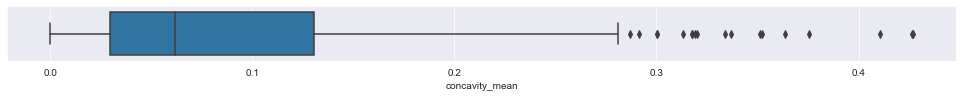

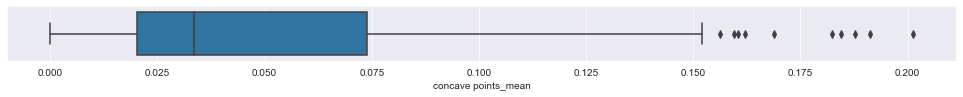

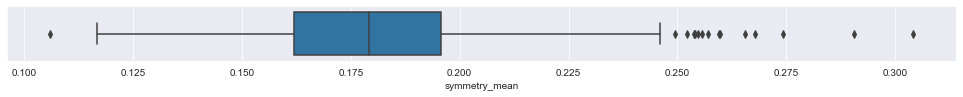

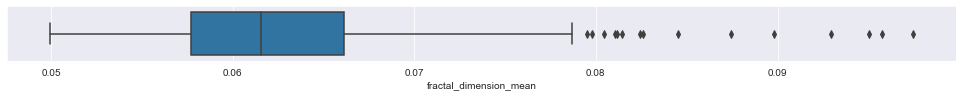

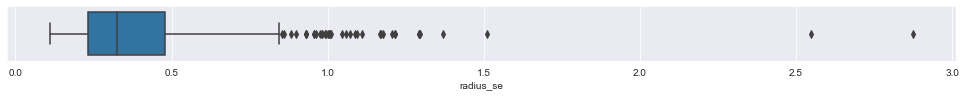

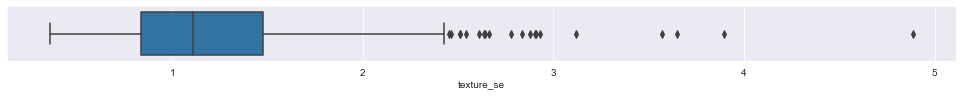

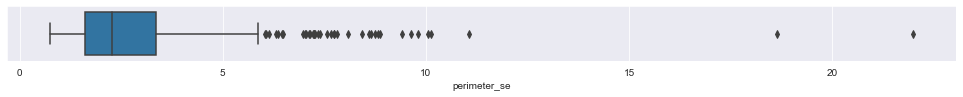

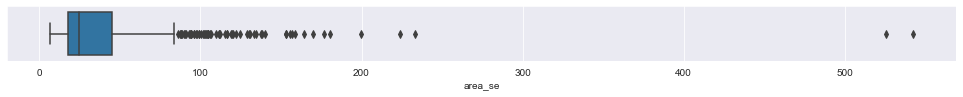

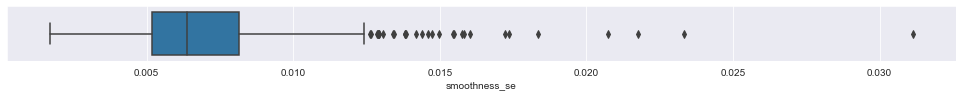

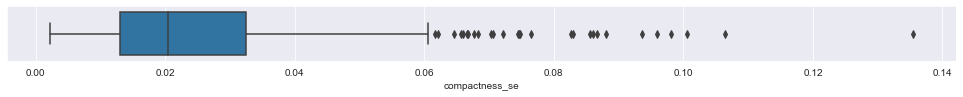

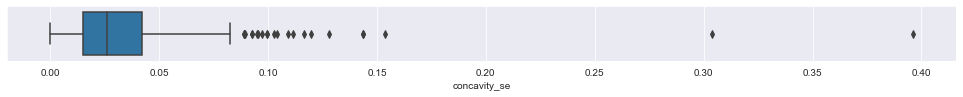

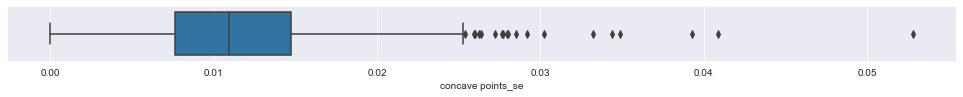

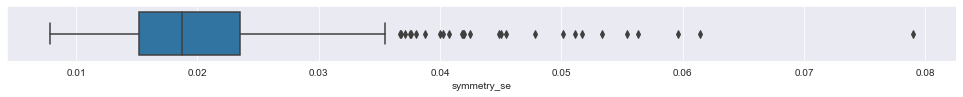

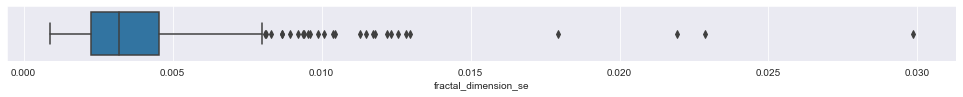

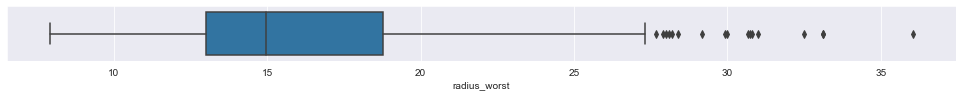

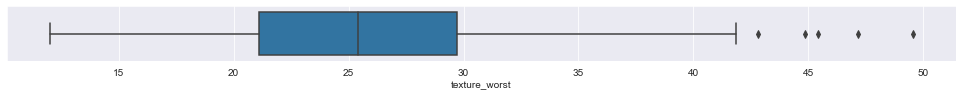

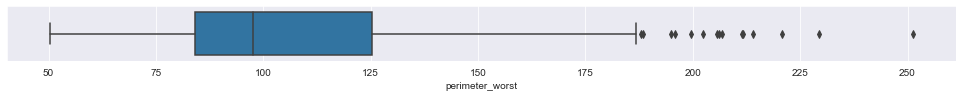

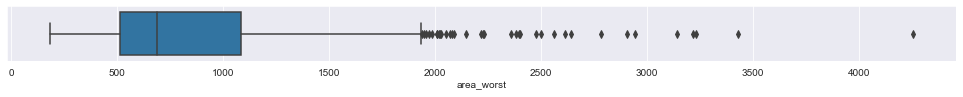

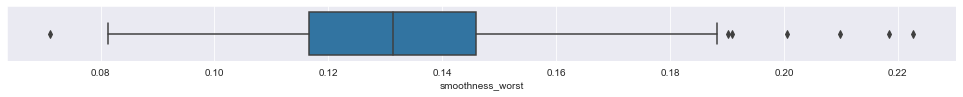

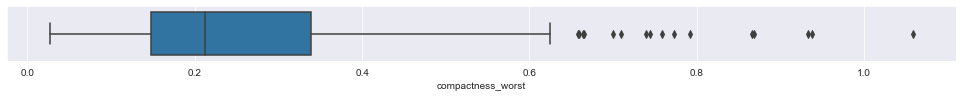

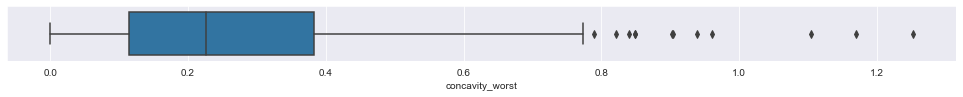

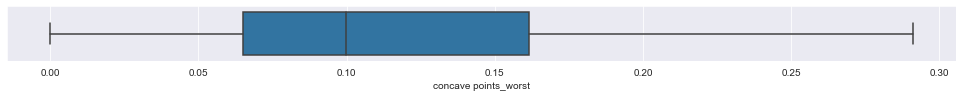

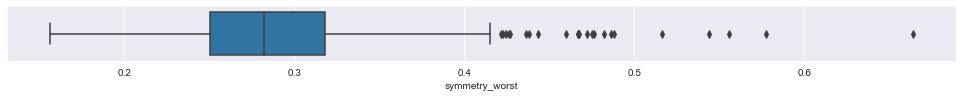

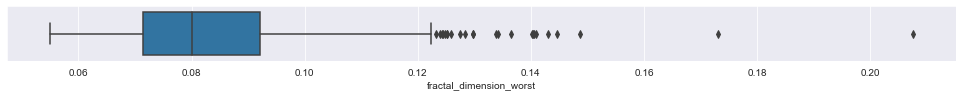

In [180]:
import matplotlib.pyplot as plt

for column in cancer1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer1, x=column)

### Finding the Outliers

In [181]:
a=cancer.select_dtypes(include=['float64'])
for i in a.columns:
    High=cancer[i].mean() + 3*cancer[i].std()
    Low=cancer[i].mean() - 3*cancer[i].std()
    cancer[i] = np.where(cancer[i]>High,High,
    np.where(cancer[i]<Low,Low,cancer[i]
            ))

In [182]:
#cancer['radius_mean'].describe()

In [183]:
#cancer[(cancer['radius_mean'] > 24.699438218530798) | (cancer['radius_mean'] < 3.5551452612583283)]

In [184]:
#cancer_n = cancer[(cancer['radius_mean'] < 3.5551452612583283) & (cancer['radius_mean'] > 24.699438218530798)]
#cancer_n

In [185]:
#print("Highest allowed",cancer['radius_mean'].mean() + 3*cancer['radius_mean'].std())
#print("Lowest allowed",cancer['radius_mean'].mean() - 3*cancer['radius_mean'].std())

In [186]:
#upper_limit = cancer['radius_mean'].mean() + 3*cancer['radius_mean'].std()
#lower_limit = cancer['radius_mean'].mean() - 3*cancer['radius_mean'].std()

In [187]:
#cancer.column_name.loc[df.column_name > max_value]  = max_value

In [188]:
#cancer['area_se'] = np.where(
    #cancer['area_se']>upper_limit,
    #upper_limit,
    #np.where(
        #cancer['area_se']<lower_limit,
        #lower_limit,
        #cancer['area_se']
    #)
#)

### Checking the Target Variable

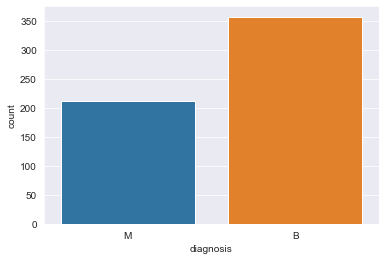

In [189]:
sns.countplot(data=cancer, x='diagnosis')

In [190]:
cancer["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [191]:
357/569

0.6274165202108963

## Co-relation Matrix

In [192]:
corr=cancer.corr()
corr
corr.to_csv("Corr.csv")

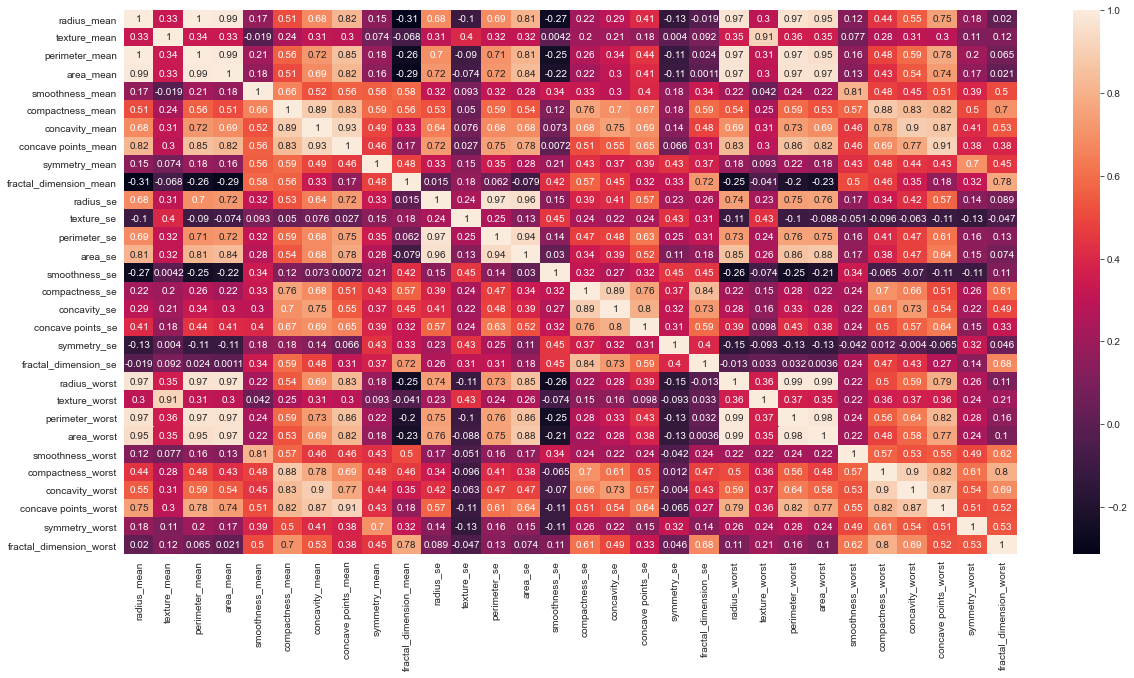

In [193]:
plt.figure(figsize=(20,10))
sns.heatmap(cancer.corr(),annot=True)
plt.show()

In [194]:
cancer.drop(columns=["radius_mean","area_mean","concave points_mean","area_se","radius_worst","perimeter_worst"],inplace=True)

In [195]:
cancer["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [196]:
#sns.pairplot(cancer)

In [197]:
cancer.columns

Index(['diagnosis', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [198]:
#area_worst
#concave points_worst


## VIF Check

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [200]:
vif

,variables,VIF
0,texture_mean,13.733262
1,perimeter_mean,28.213544
2,smoothness_mean,7.942343
3,compactness_mean,30.645178
4,concavity_mean,26.531572
5,symmetry_mean,4.284081
6,fractal_dimension_mean,12.702473
7,radius_se,24.913101
8,texture_se,5.426435
9,perimeter_se,23.835650


In [201]:
cancer.drop(columns=["compactness_worst","concavity_worst"],inplace=True)

### After dropping compactness_worst, concavity_worst

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif1 = pd.DataFrame()
vif1["variables"] = X.columns
vif1["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [203]:
vif1

,variables,VIF
0,texture_mean,13.471180
1,perimeter_mean,27.647770
2,smoothness_mean,7.904634
3,compactness_mean,20.751441
4,concavity_mean,17.305456
5,symmetry_mean,4.135464
6,fractal_dimension_mean,10.172062
7,radius_se,24.184546
8,texture_se,5.302224
9,perimeter_se,22.895107


In [204]:
cancer.drop(columns=["area_worst","perimeter_mean"],inplace=True)

### After dropping area_worst,perimeter_mean

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif2 = pd.DataFrame()
vif2["variables"] = X.columns
vif2["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [206]:
vif2

,variables,VIF
0,texture_mean,13.024103
1,smoothness_mean,7.799891
2,compactness_mean,17.887144
3,concavity_mean,16.704354
4,symmetry_mean,4.078472
5,fractal_dimension_mean,7.898961
6,radius_se,20.531508
7,texture_se,5.124557
8,perimeter_se,22.686383
9,smoothness_se,4.834244


In [207]:
cancer.drop(columns=["perimeter_se","radius_se"],inplace=True)

### After dropping perimeter_se,radius_se

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif3 = pd.DataFrame()
vif3["variables"] = X.columns
vif3["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [209]:
vif3

,variables,VIF
0,texture_mean,12.894005
1,smoothness_mean,7.748006
2,compactness_mean,17.295152
3,concavity_mean,15.661870
4,symmetry_mean,4.034181
5,fractal_dimension_mean,7.721875
6,texture_se,5.053514
7,smoothness_se,4.832006
8,compactness_se,13.739799
9,concavity_se,10.825400


In [210]:
cancer.drop(columns=["compactness_mean","concave points_worst"],inplace=True)

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif4 = pd.DataFrame()
vif4["variables"] = X.columns
vif4["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [212]:
vif4

,variables,VIF
0,texture_mean,12.524032
1,smoothness_mean,7.182078
2,concavity_mean,5.012822
3,symmetry_mean,3.933719
4,fractal_dimension_mean,6.316693
5,texture_se,4.916461
6,smoothness_se,4.437367
7,compactness_se,9.125983
8,concavity_se,7.787730
9,concave points_se,3.890809


In [213]:
cancer.drop(columns=["texture_worst"],inplace=True)

In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif5 = pd.DataFrame()
vif5["variables"] = X.columns
vif5["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [215]:
vif5

,variables,VIF
0,texture_mean,1.756749
1,smoothness_mean,6.873628
2,concavity_mean,5.012366
3,symmetry_mean,3.676644
4,fractal_dimension_mean,6.307114
5,texture_se,2.145227
6,smoothness_se,4.101782
7,compactness_se,9.118521
8,concavity_se,7.765639
9,concave points_se,3.870487


In [216]:
cancer.drop(columns=["fractal_dimension_worst","smoothness_worst"],inplace=True)

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif6 = pd.DataFrame()
vif6["variables"] = X.columns
vif6["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [218]:
vif6

,variables,VIF
0,texture_mean,1.707339
1,smoothness_mean,3.058690
2,concavity_mean,4.765686
3,symmetry_mean,2.996566
4,fractal_dimension_mean,3.787656
5,texture_se,2.121956
6,smoothness_se,2.028877
7,compactness_se,8.988171
8,concavity_se,7.547739
9,concave points_se,3.824283


## Encoding of the Target Variable to 1 and 0

1- Benign(Survived)


0- Malignant (not Survived)

In [219]:
cancer["diagnosis"]=np.where(cancer["diagnosis"]=="B",1,0)

## Train Test Split

In [220]:
y=cancer["diagnosis"]
X=cancer.drop(["diagnosis"],axis=1)

In [221]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2, random_state=88)

## Scaling

In [222]:
scale=MinMaxScaler()
X_train_scaled=scale.fit_transform(X_train)

X_test_scaled=scale.transform(X_test)

#scale=StandardScaler()
#sc_fit=sc.fit(X_train)

In [223]:
#X_test_scaled.head()

In [224]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [225]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [226]:
X_train_scaled

,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst
0,0.408313,0.613050,0.261618,0.473938,0.318354,0.386461,0.207375,0.225053,0.269820,0.451051,0.140632,0.144783,0.344949
1,0.491488,0.377818,0.200452,0.335441,0.520302,0.409571,0.302805,0.640774,0.358263,0.538820,0.289326,0.656947,0.281974
2,0.518620,0.252914,0.186792,0.330359,0.328643,0.572140,0.249897,0.552926,0.422615,0.442472,0.502090,0.630744,0.289180
3,0.335813,0.434938,0.086993,0.499985,0.300717,0.309958,0.208945,0.225963,0.169781,0.178111,0.183879,0.200788,0.380352
4,0.418098,0.402586,0.048268,0.556527,0.332758,0.425509,0.253857,0.089122,0.085095,0.252021,0.416664,0.070694,0.602172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.539525,0.231583,0.336323,0.451067,0.101121,0.375702,0.213952,0.658968,0.498971,0.476458,0.360871,0.382089,0.251897
451,0.442117,0.286807,0.915664,0.409136,0.815140,0.449417,0.196614,0.938367,1.000000,0.756261,0.474594,1.000000,0.260983
452,0.406089,0.504737,0.081962,0.444078,0.348926,0.367733,0.219781,0.184638,0.124865,0.329858,0.299204,0.114243,0.369386
453,0.545307,0.564463,0.486037,0.560974,0.333934,0.625135,0.404064,0.501984,0.434538,0.605141,0.425741,0.334019,0.451786


In [227]:
X_test_scaled

,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst
0,0.152561,0.845320,0.362241,0.633399,1.000000,0.409571,1.000000,0.605947,0.423758,0.478437,0.492213,0.976646,0.401970
1,0.502163,0.684153,0.459814,0.423748,0.316003,0.704029,0.283077,0.204261,0.367655,0.575445,0.277847,0.261867,0.331477
2,0.265092,0.429012,0.033632,0.648646,0.386846,0.417142,0.831967,0.109395,0.068166,0.312535,0.269572,0.310583,0.399777
3,0.339816,0.477481,0.465607,0.324641,0.141687,0.117703,0.264843,0.216996,0.218943,0.406507,0.130221,0.075307,0.352155
4,0.119202,0.576314,0.121570,0.571139,0.281904,0.120931,0.401897,0.124079,0.137442,0.409476,0.303208,0.124853,0.395391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.376288,0.137372,0.075467,0.365300,0.173434,0.122286,0.037514,0.149680,0.088116,0.172996,0.084038,0.098004,0.335549
110,0.266871,0.632011,0.139286,0.576222,0.533530,0.153644,0.106864,0.217386,0.138667,0.214142,0.237537,0.141184,0.507241
111,0.266426,0.872576,0.481158,0.652458,0.769283,0.210424,0.361917,0.405429,0.299873,0.375161,0.367544,0.386333,0.758198
112,0.636488,0.421546,0.094585,0.397066,0.255742,0.298402,0.164480,0.206990,0.091546,0.283961,0.346188,0.184364,0.299833


## Logistic Regression

In [228]:
from sklearn.linear_model import LogisticRegression

In [229]:
log=LogisticRegression()

In [230]:
model1=log.fit(X_train_scaled,y_train)

In [231]:
model1

LogisticRegression()

In [232]:
print("accuracy of train",model1.score(X_train_scaled,y_train))
print("accuracy of test",model1.score(X_test_scaled,y_test))

accuracy of train 0.9406593406593406
accuracy of test 0.9736842105263158


In [233]:
pred_train=model1.predict(X_train_scaled)

In [234]:
pred_test=model1.predict(X_test_scaled)

In [235]:
pred_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,

In [236]:
pred_test

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0])

In [237]:
metrics.confusion_matrix(y_train,pred_train)

array([[150,  23],
       [  4, 278]], dtype=int64)

In [238]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       173
           1       0.92      0.99      0.95       282

    accuracy                           0.94       455
   macro avg       0.95      0.93      0.94       455
weighted avg       0.94      0.94      0.94       455



In [239]:
metrics.confusion_matrix(y_test, pred_test)
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [240]:
from sklearn.metrics import accuracy_score

In [241]:
LR_Score = accuracy_score(y_test,pred_test)

In [242]:
LR_Score

0.9736842105263158

## Auc Curve

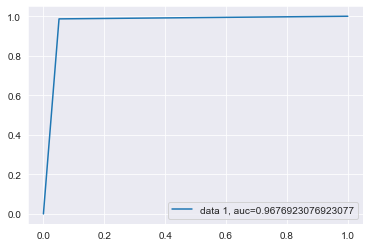

In [243]:
y_pred_proba = model1.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,pred_test)
auc = metrics.roc_auc_score(y_test,pred_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



In [244]:
pip install plot-metric

Note: you may need to restart the kernel to use updated packages.


## ROC Curve

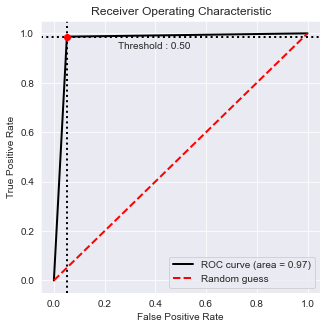

In [245]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test,pred_test, labels=["B", "M"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Decision Tree

In [247]:
from sklearn.tree import DecisionTreeClassifier

In [248]:
dt1=DecisionTreeClassifier()
dt1.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [249]:
print("Train score:",dt1.score(X_train_scaled,y_train))

Train score: 1.0


In [250]:
print("Test score:",dt1.score(X_test_scaled,y_test))

Test score: 0.9298245614035088


In [251]:
#from sklearn.tree import plot_tree
#from sklearn import tree

#fn=X_train_scaled.columns
#cn=["B","M"]

# Setting dpi = 300 to make image clearer than default
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=1000)

#plot_tree(dt1,
           #feature_names = fn, 
           #class_names=cn,
           #filled = True);

#Some tree squares are hidden, this means that either the min sample split is less than that specified in the criterion or max split leaf
#concavity_mean variable comes on top so it is the most important variable

In [252]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ('gini','entropy'),
              'min_samples_split':[2,3,4,5],
              'max_depth': [2,4,6,8,9,10,11,12],
              'min_samples_leaf':[2,5,10]}

tr = DecisionTreeClassifier()

gsearch = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=2)

gsearch.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 522 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 1920 out of 1920 | elapsed:    7.2s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [253]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [254]:
dt2=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=2,min_samples_split=3)
                          
dt2.fit(X_train_scaled,y_train)
print("Train score:",dt2.score(X_train_scaled,y_train))
print("Test score:",dt2.score(X_test_scaled,y_test))

Train score: 0.9912087912087912
Test score: 0.9210526315789473


In [255]:
dt3=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=3,min_samples_split=3)
                          
dt3.fit(X_train_scaled,y_train)
print("Train score:",dt3.score(X_train_scaled,y_train))
print("Test score:",dt3.score(X_test_scaled,y_test))

Train score: 0.9846153846153847
Test score: 0.956140350877193


In [256]:
pred_train=dt3.predict(X_train_scaled)

In [257]:
pred_test=dt3.predict(X_test_scaled)

In [258]:
metrics.confusion_matrix(y_train,pred_train)

array([[170,   3],
       [  4, 278]], dtype=int64)

In [259]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       173
           1       0.99      0.99      0.99       282

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [260]:
metrics.confusion_matrix(y_test,pred_test)

array([[36,  3],
       [ 2, 73]], dtype=int64)

In [261]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.96      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [262]:
DT_Score = accuracy_score(y_test,pred_test)

In [263]:
DT_Score

0.956140350877193

## AUC Curve

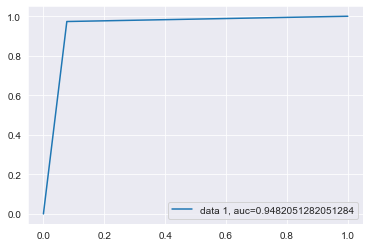

In [264]:
y_pred_proba = dt3.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,pred_test)
auc = metrics.roc_auc_score(y_test,pred_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



## ROC Curve

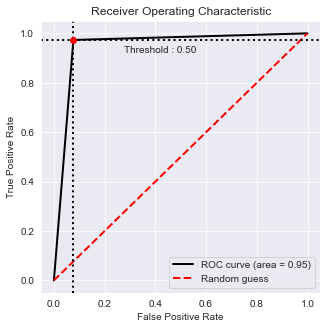

In [265]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test,pred_test, labels=["B", "M"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [287]:
imp=pd.DataFrame({"columns": X_train_scaled.columns, "importance":dt3.feature_importances_}).sort_values(by="importance", ascending=False)
imp

,columns,importance
2,concavity_mean,0.625806
8,concavity_se,0.065870
4,fractal_dimension_mean,0.059150
0,texture_mean,0.054196
10,symmetry_se,0.045708
11,fractal_dimension_se,0.044978
12,symmetry_worst,0.031126
3,symmetry_mean,0.028432
7,compactness_se,0.016383
1,smoothness_mean,0.015591


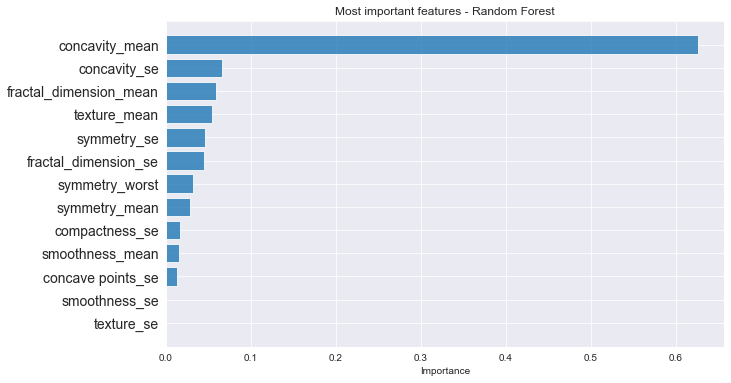

In [288]:
feature_names = X_train_scaled.columns
feature_imports = dt3.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(13, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

## Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier

In [268]:
rf1=RandomForestClassifier()
rf1.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [269]:
print("Train R2",rf1.score(X_train_scaled,y_train))
print("Test R2",rf1.score(X_test_scaled,y_test))

Train R2 1.0
Test R2 0.956140350877193


In [270]:
parameters={"n_estimators":[50,100,150,200],
            "criterion":["entropy","gini"],
            "max_depth":[3,5,7,9],
#              "min_samples_split":[2,4,6,10],
#              "min_samples_leaf":[2,4,6,10],
            "bootstrap":[True,False],
            "max_features":["log","sqrt"]
           }

rf=RandomForestClassifier()
rf_gs=GridSearchCV(estimator=rf, param_grid=parameters, scoring="accuracy", verbose=1, n_jobs=2, cv=10)
rf_gs.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 164 tasks      | elapsed:   10.1s
[Parallel(n_jobs=2)]: Done 764 tasks      | elapsed:   46.6s
[Parallel(n_jobs=2)]: Done 1280 out of 1280 | elapsed:  1.4min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['log', 'sqrt'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [271]:
rf_gs.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [272]:
rf3=RandomForestClassifier(criterion="entropy", max_depth=9, max_features="sqrt", n_estimators=200, bootstrap=False, random_state=88)   
rf3.fit(X_train_scaled, y_train)
print("Train R2 :",rf3.score(X_train_scaled, y_train))
print("Test R2 :",rf3.score(X_test_scaled, y_test))

Train R2 : 1.0
Test R2 : 0.9824561403508771


In [273]:
pred_train=rf3.predict(X_train_scaled)
pred_test=rf3.predict(X_test_scaled)

In [274]:
metrics.confusion_matrix(y_train,pred_train)

array([[173,   0],
       [  0, 282]], dtype=int64)

In [275]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       282

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [276]:
metrics.confusion_matrix(y_test,pred_test)

array([[39,  0],
       [ 2, 73]], dtype=int64)

In [277]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [280]:
RF_Score = accuracy_score(y_test,pred_test)

In [281]:
RF_Score

0.9824561403508771

## AUC Curve (RF)

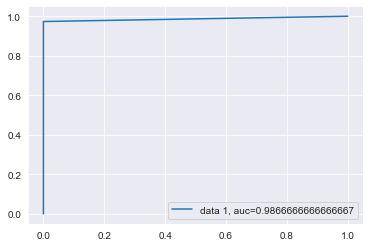

In [282]:
y_pred_proba = rf3.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,pred_test)
auc = metrics.roc_auc_score(y_test,pred_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## ROC Curve(RF)

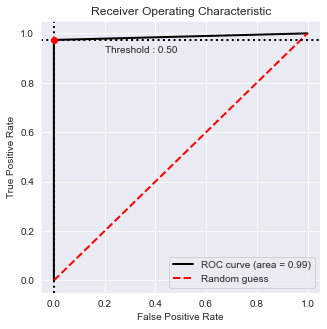

In [283]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test,pred_test, labels=["B", "M"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [284]:
imp1=pd.DataFrame({"columns": X_train_scaled.columns, "importance":rf3.feature_importances_}).sort_values(by="importance", ascending=False)
imp1

,columns,importance
2,concavity_mean,0.322559
0,texture_mean,0.101782
8,concavity_se,0.099973
4,fractal_dimension_mean,0.071497
12,symmetry_worst,0.067732
1,smoothness_mean,0.064886
9,concave points_se,0.062117
10,symmetry_se,0.043987
7,compactness_se,0.040700
11,fractal_dimension_se,0.038796


In [285]:
imp1.to_csv("imp.csv")

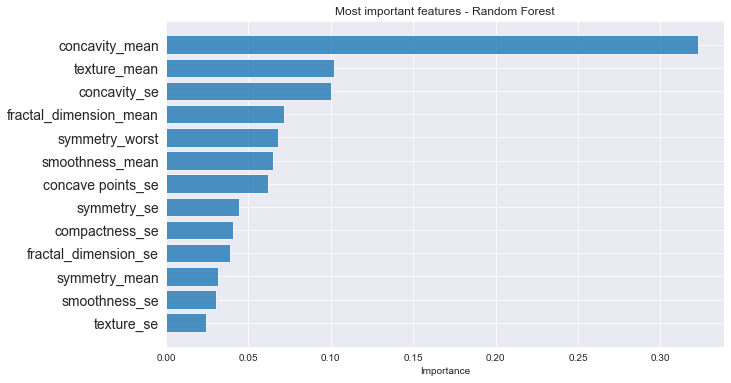

In [286]:
feature_names = X_train_scaled.columns
feature_imports = rf3.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(13, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

## Keeping 10 features

In [289]:
X_train1=X_train_scaled[["concavity_mean","concavity_se","texture_mean","fractal_dimension_mean","symmetry_worst","concave points_se","smoothness_mean","symmetry_se","compactness_se","fractal_dimension_se"]]
X_test1=X_test_scaled[["concavity_mean","concavity_se","texture_mean","fractal_dimension_mean","symmetry_worst","concave points_se","smoothness_mean","symmetry_se","compactness_se","fractal_dimension_se"]]

In [290]:
rf5=RandomForestClassifier(criterion="entropy", max_depth=9,  n_estimators=200, random_state=88)   
rf5.fit(X_train1, y_train)
print("Train R2 :",rf5.score(X_train1, y_train))
print("Test R2 :",rf5.score(X_test1, y_test))

Train R2 : 1.0
Test R2 : 0.9649122807017544


## Keeping 8 features

In [291]:
X_train2=X_train_scaled[["concavity_mean","concavity_se","texture_mean","fractal_dimension_mean","symmetry_worst","concave points_se","smoothness_mean","symmetry_se"]]
X_test2=X_test_scaled[["concavity_mean","concavity_se","texture_mean","fractal_dimension_mean","symmetry_worst","concave points_se","smoothness_mean","symmetry_se"]]

In [292]:
rf6=RandomForestClassifier(criterion="entropy", max_depth=9,  n_estimators=200, random_state=88)   
rf6.fit(X_train2, y_train)
print("Train R2 :",rf6.score(X_train2, y_train))
print("Test R2 :",rf6.score(X_test2, y_test))

Train R2 : 1.0
Test R2 : 0.9736842105263158


## AdaBoost

In [293]:
from sklearn.ensemble import AdaBoostClassifier

In [294]:
adb=AdaBoostClassifier()

In [295]:
adb.fit(X_train_scaled,y_train)
print("Train score",adb.score(X_train_scaled,y_train))
print("Test score",adb.score(X_test_scaled,y_test))

Train score 0.9956043956043956
Test score 0.9824561403508771


In [296]:
adb1=AdaBoostClassifier(n_estimators=300,learning_rate=.1,random_state=88)

adb1.fit(X_train_scaled,y_train)

print("Train score",adb1.score(X_train_scaled,y_train))
print("Test score",adb1.score(X_test_scaled,y_test))

Train score 0.9868131868131869
Test score 0.9912280701754386


In [126]:
from sklearn.model_selection import GridSearchCV

params={"n_estimators":[50,100,150,200,250,300,350],
            "learning_rate":[1,.1,.01,.001]}

adb2=AdaBoostClassifier()
           
adb_gs=GridSearchCV(adb2,param_grid=params,cv=10,n_jobs=2,verbose=1)
adb_gs.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  78 tasks      | elapsed:   14.4s
[Parallel(n_jobs=2)]: Done 228 tasks      | elapsed:   45.7s
[Parallel(n_jobs=2)]: Done 280 out of 280 | elapsed:   59.1s finished


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=2,
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350]},
             verbose=1)

In [297]:
adb_gs.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [298]:
adb3=AdaBoostClassifier(n_estimators=300,learning_rate=1, random_state=88)   
adb3.fit(X_train_scaled, y_train)
print("Train R2 :",adb3.score(X_train_scaled, y_train))
print("Test R2 :",adb3.score(X_test_scaled, y_test))

Train R2 : 1.0
Test R2 : 0.9824561403508771


In [299]:
pred_train=adb3.predict(X_train_scaled)
pred_test=adb3.predict(X_test_scaled)

In [300]:
metrics.confusion_matrix(y_train,pred_train)

array([[173,   0],
       [  0, 282]], dtype=int64)

In [301]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       282

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [302]:
metrics.confusion_matrix(y_test,pred_test)

array([[38,  1],
       [ 1, 74]], dtype=int64)

In [303]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.99      0.99      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [305]:
ADA_Score = accuracy_score(y_test,pred_test)

In [306]:
ADA_Score

0.9824561403508771

## AUC(ADA Boost)

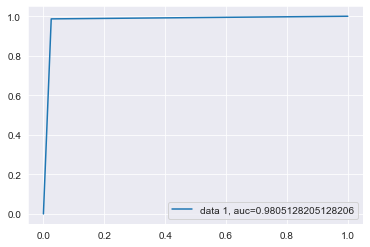

In [307]:
y_pred_proba = adb3.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,pred_test)
auc = metrics.roc_auc_score(y_test,pred_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## ROC Curve(ADA Boost)

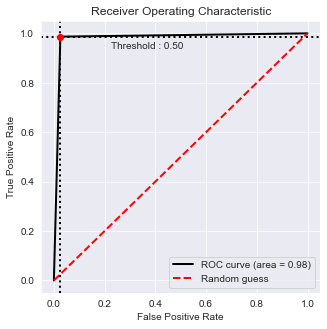

In [308]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test,pred_test, labels=["B", "M"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Feature Importance(ADA Boost)

In [309]:
imp2=pd.DataFrame({"columns": X_train_scaled.columns, "importance":adb3.feature_importances_}).sort_values(by="importance", ascending=False)
imp2

,columns,importance
2,concavity_mean,0.203333
4,fractal_dimension_mean,0.123333
1,smoothness_mean,0.096667
0,texture_mean,0.083333
9,concave points_se,0.083333
7,compactness_se,0.076667
11,fractal_dimension_se,0.070000
8,concavity_se,0.063333
12,symmetry_worst,0.063333
10,symmetry_se,0.056667


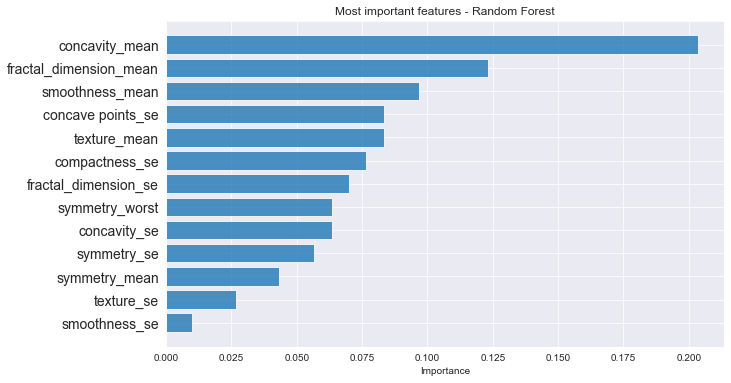

In [310]:
feature_names = X_train_scaled.columns
feature_imports = adb3.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(13, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

## XG Boost

In [311]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [312]:
from xgboost import XGBClassifier

In [313]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled,y_train)
print("Train score",xgb.score(X_train_scaled,y_train))
print("Test score",xgb.score(X_test_scaled,y_test))

[21:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score 1.0
Test score 0.9912280701754386


C:\Users\hariharan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [314]:
params={"n_estimators":[50,100,150,200,250],
        "max_depth":[5,7,9,11,13,15]}
        #"min_child_weight":[],
        #"subsample":[],
        #"col_sample_bytree":[],
        #"reg_alpha":[],
        #"reg_lambda":[]
        
        


xgb1=XGBClassifier()
           
xgb_gs=GridSearchCV(xgb1,param_grid=params,cv=5,n_jobs=2,verbose=1)
xgb_gs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  56 tasks      | elapsed:    5.4s


[21:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:   10.7s finished
C:\Users\hariharan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [315]:
xgb_gs.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [316]:
xgb1=XGBClassifier(n_estimators=50,max_depth=5,random_state=88)

xgb1.fit(X_train_scaled,y_train)

print("Train score",xgb1.score(X_train_scaled,y_train))
print("Test score",xgb1.score(X_test_scaled,y_test))

[21:46:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score 1.0
Test score 0.9824561403508771


In [317]:
pred_train=xgb1.predict(X_train_scaled)
pred_test=xgb1.predict(X_test_scaled)

In [318]:
X_test_scaled

,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst
0,0.152561,0.845320,0.362241,0.633399,1.000000,0.409571,1.000000,0.605947,0.423758,0.478437,0.492213,0.976646,0.401970
1,0.502163,0.684153,0.459814,0.423748,0.316003,0.704029,0.283077,0.204261,0.367655,0.575445,0.277847,0.261867,0.331477
2,0.265092,0.429012,0.033632,0.648646,0.386846,0.417142,0.831967,0.109395,0.068166,0.312535,0.269572,0.310583,0.399777
3,0.339816,0.477481,0.465607,0.324641,0.141687,0.117703,0.264843,0.216996,0.218943,0.406507,0.130221,0.075307,0.352155
4,0.119202,0.576314,0.121570,0.571139,0.281904,0.120931,0.401897,0.124079,0.137442,0.409476,0.303208,0.124853,0.395391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.376288,0.137372,0.075467,0.365300,0.173434,0.122286,0.037514,0.149680,0.088116,0.172996,0.084038,0.098004,0.335549
110,0.266871,0.632011,0.139286,0.576222,0.533530,0.153644,0.106864,0.217386,0.138667,0.214142,0.237537,0.141184,0.507241
111,0.266426,0.872576,0.481158,0.652458,0.769283,0.210424,0.361917,0.405429,0.299873,0.375161,0.367544,0.386333,0.758198
112,0.636488,0.421546,0.094585,0.397066,0.255742,0.298402,0.164480,0.206990,0.091546,0.283961,0.346188,0.184364,0.299833


In [319]:
metrics.confusion_matrix(y_train,pred_train)

array([[173,   0],
       [  0, 282]], dtype=int64)

In [320]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       282

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [321]:
metrics.confusion_matrix(y_test,pred_test)

array([[37,  2],
       [ 0, 75]], dtype=int64)

In [322]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.97      1.00      0.99        75

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



In [323]:
XG_Score = accuracy_score(y_test,pred_test)

In [324]:
XG_Score

0.9824561403508771

## ROC and AUC Curve

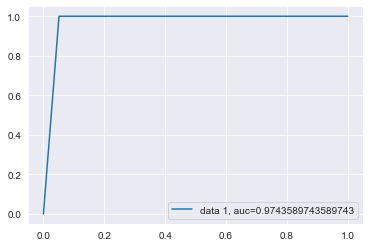

In [325]:
y_pred_proba = xgb1.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,pred_test)
auc = metrics.roc_auc_score(y_test,pred_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

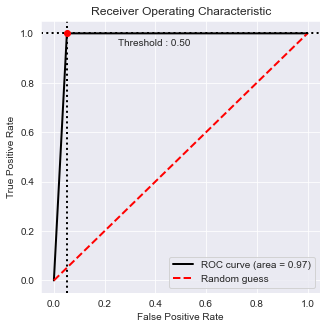

In [326]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test,pred_test, labels=["B", "M"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [327]:
imp3=pd.DataFrame({"columns": X_train_scaled.columns, "importance":xgb1.feature_importances_}).sort_values(by="importance", ascending=False)
imp3

,columns,importance
2,concavity_mean,0.384637
11,fractal_dimension_se,0.140888
4,fractal_dimension_mean,0.075799
8,concavity_se,0.063158
0,texture_mean,0.060047
10,symmetry_se,0.059325
12,symmetry_worst,0.054181
6,smoothness_se,0.036799
1,smoothness_mean,0.034808
9,concave points_se,0.028521


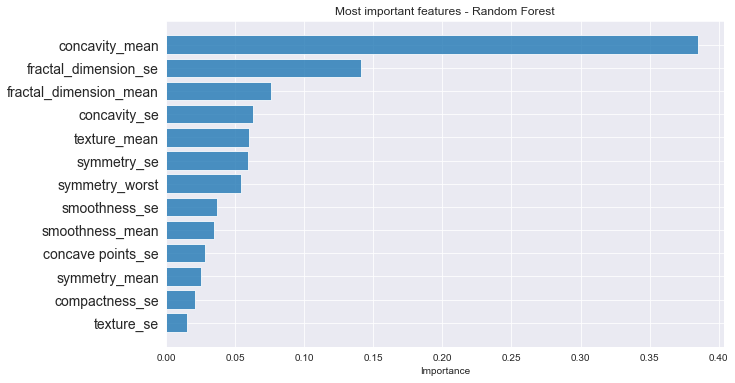

In [328]:
feature_names = X_train_scaled.columns
feature_imports = xgb1.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(13, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

After checking out feature importance in all the models starting from the decision tree to random forest, followed by XGBoost, ADABoost we saw that concavity mean is the most important feature helping us to predict the surviavla of patients.

## Results

In [329]:
Results = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest','AdaBoost','XGBoost'],
                        'Accuracy Score' : [DT_Score,RF_Score,XG_Score,ADA_Score,LR_Score]})

In [330]:
Results

,Model,Accuracy Score
0,Logistic Regression,0.956140
1,Decision Tree,0.982456
2,Random Forest,0.982456
3,AdaBoost,0.982456
4,XGBoost,0.973684


In [331]:
Final_Results = Results.sort_values(by = 'Accuracy Score', ascending=False)
Final_Results = Final_Results.set_index('Model')
print(Final_Results)

                     Accuracy Score
Model                              
Decision Tree              0.982456
Random Forest              0.982456
AdaBoost                   0.982456
XGBoost                    0.973684
Logistic Regression        0.956140


## Combining all the ROC Plots together

C:\Users\hariharan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:36:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


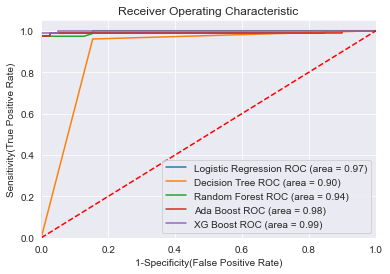

In [337]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},

{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
    
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},
    
{
    'label': 'Ada Boost',
    'model': AdaBoostClassifier(),
},

{
    'label': 'XG Boost',
    'model': XGBClassifier(),
}
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_scaled))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

After plotting all the ROC plots together, we find that the area under the curve proved to be quite decent for all the models overall.
Higher the AUC higher the probability of the model to distinguish between the classes and thus is also known as the degree of separability.

## Final Model

### Out of all the models, the models using the ensemble techniques were chosen as the best model by us owing to its robustness nature in its predictions.Here, in our dataset we can see that the ensemble models(random forest, ada boost, xg boost) are providing us better results as seen in the confusion metrics. 

In [152]:
#Final_df=pd.concat([X_test,y_test],axis=1)

In [153]:
#Final_df

In [154]:
#y_pred

In [155]:
#X_test